In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
global classifier
import pandas as pd
df = pd.read_csv('heart.csv')
df.shape

(303, 8)

In [3]:
df.head()

,Age,Sex,Chest Pain type,Blood pressure,Cholestoral,Fasting blood sugar,Heart rate,Output
0,63,1,3,145,233,1,150,1
1,37,1,2,130,250,0,187,1
2,41,0,1,130,204,0,172,1
3,56,1,1,120,236,0,178,1
4,57,0,0,120,354,0,163,1


In [4]:
df.describe()

,Age,Sex,Chest Pain type,Blood pressure,Cholestoral,Fasting blood sugar,Heart rate,Output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000


<Axes: >

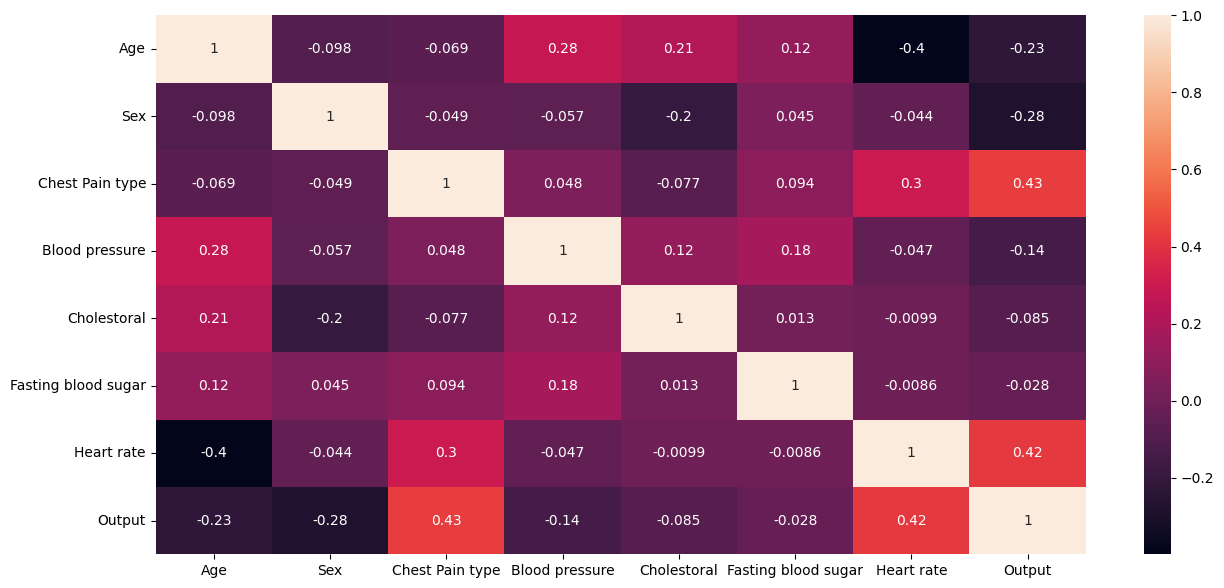

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [3]:
global classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df[['Age','Sex','Chest Pain type','Blood pressure','Cholestoral','Fasting blood sugar','Heart rate']], df['Output'], test_size=0.25, random_state=100)


classifier = LogisticRegression(solver='lbfgs', max_iter=120000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[33  7]
 [ 4 32]]


In [4]:
import pickle
pickle_out = open("classifier.pkl", "wb") 
pickle.dump(classifier, pickle_out) 
pickle_out.close()